## Guilherme Zuccolotto Soriano

<p>Neste exercício proposto pudemos avaliar a eficácia de modelos de predição, analise e seleção de variáveis para a utilização de modelos. Conceitos de heurístca, e efetividade de modelos, (erro médio, acurácia e tempo de processamento).</p>

Pudemos checar que 3 variáveis podem simular com um erro aceitável a distribuição total das notas totais dos alunos, isso nos possibilita trabalhar com um volume menor de informação e ter uma solução boa para nosso cliente.

Analisando os modelos, e checando as efetividades, pudemos determinar qual modelo nos traria uma resposta melhor, dado a sua acurácia e seu tempo de resposta no treino dos dados.

Utilizamos o plot da matriz de confusão para entender os tipos de erros que estamos cometendo e a melhor utilização do modelo. Dado a necessidade do cliente podemos cometer mais um tipo de erro do que outro, isso pode nos guiar para uma melhor escolha de modelo.

No final testamos uma herística, sem modelo, que nos apresentou um resultado satisfatório, comprovando a nossa suposição inicial de que as 3 notas escolhidas podem nos dar uma excelente proxy para a nota total, se formos considerar os top 25% dos estudantes. 

## Formação Machine Learning Alura - Dados do ENEM

Na formação de Machine Learning da www.alura.com.br vamos inicialmente analisar os dados do Enem 2017. O Enem é uma prova aplicada aos alunos que completam o ensino médio, usada como porta de entrada para diversas faculdades no Brasil. A prova é composta de 9 avaliações distintas: Ciências da Natureza, Ciências Humanas, Linguagens e Códigos, Matemática e 5 competências ligadas a prova de redação.

Duas situações podem ser interessantes:

a) uma faculdade deseja dar bolsa de estudos para os e as melhores estudantes. Para isso não deseja exigir que as pessoas façam todas as partes da prova.
b) seria possível prever a nota dos alunos e alunas se eles fizerem somente parte da prova? Seja deixando em branco propositalmente parte dela, ou exigindo somente uma correção parcial da prova de redação, como por exemplo somente um ou dois componentes ao invés de 5?

As duas perguntas são resumidas em: será possível prever quem teria as melhores notas em todas as partes, somente tendo feito parte da prova?

Para responder essa pergunta tentaremos modelar os dados de duas formas diferentes.

### Dicas para o projeto completo:

- todo gráfico deve ter um título, labels e legendas que fazem sentido
- configure um tamanho adequado para os gráficos
- utilize as versões dos arquivos de dados disponíveis no github

## Pergunta: conferindo as versões utilizadas

- Devemos usar pandas 0.24.0 ou mais recente
- Devemos usar seaborn 0.9.0 ou mais recente
- Devemos usar scipy 1.2.0 ou mais recente

In [21]:
import warnings
warnings.simplefilter("once")

#!pip install pandas=="0.24.0" --quiet
#!pip install seaborn=="0.9.0" --quiet
#!pip install scipy=="1.2.0" --quiet
#!pip install yellowbrick=="0.9.0" --quiet
#!pip install numpy=="1.16.0" --quiet

In [22]:
import pandas as pd
import seaborn as sns
import scipy
import yellowbrick
import numpy as np
import matplotlib.pyplot as plt

print("Usando pandas %s" % pd.__version__)
print("Usando seaborn %s" % sns.__version__)
print("Usando scipy %s" % scipy.__version__)
print("Usando yellowbrick %s" % yellowbrick.__version__)
print("Usando numpy %s" % np.__version__)

Usando pandas 1.0.1
Usando seaborn 0.10.0
Usando scipy 1.4.1
Usando yellowbrick 1.1
Usando numpy 1.18.1


In [23]:
# Vamos configurar o pandas para usar impressão de ponto flutuante com 3 casas decimais
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Pergunta: carregue os dados

- baixe os dados de 2017 em http://download.inep.gov.br/microdados/microdados_enem2017.zip
- salve o arquivo `DADOS/MICRODADOS_ENEM_2017.CSV` em um diretório chamado `input/MICRODADOS_ENEM_2017.CSV`
- leia esse arquivo com pandas na variável `enem`
- nem sempre um arquivo separado por vírgulas (csv) vem separado por vírgulas, use o argumento `sep=';'` para indicar que o arquivo usou `;` como separador
- nem sempre o arquivo vem com encoding UTF-8, use `encoding='iso-8859-1'` para indicar o encoding que foi utilizado no arquivo
- não carregue todas as colunas. Existem muitos dados que não utilizaremos em nosso estudo. Para isso utilize o parâmetro `usecols=["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP1", "NU_NOTA_COMP2", "NU_NOTA_COMP3", "NU_NOTA_COMP4", "NU_NOTA_COMP5"]`
- imprima os 5 primeiros elementos

In [24]:
# solução
enem = pd.read_csv('input/MICRODADOS_ENEM_2017.CSV', sep=';',encoding='iso-8859-1',
                  usecols=["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP1", "NU_NOTA_COMP2", "NU_NOTA_COMP3", "NU_NOTA_COMP4", "NU_NOTA_COMP5"])

In [25]:
enem.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
0,445.400,589.000,621.500,465.500,140.000,120.000,120.000,100.000,80.000
1,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,604.000,610.400,563.900,591.200,140.000,120.000,140.000,100.000,80.000
4,482.100,569.200,570.800,584.600,140.000,120.000,120.000,120.000,80.000


In [26]:
print("%d elementos e %d colunas" % (enem.shape[0], enem.shape[1]))
if(enem.shape[0] != 6731341):
    print("ERRO! No conjunto de 2017 existem 6731341 dados")
if(enem.shape[1] != 9):
    print("ERRO! Carregue somente 9 colunas relativas as notas")

6731341 elementos e 9 colunas


## Pergunta: abra o arquivo `DICIONARIO/Dicionário_Microdados_Enem_2017.xls`
- explore quais são as colunas que possuem as notas das 4 avaliações e das 5 componentes analisadas em redação
- crie uma lista chamada `todas_as_notas` com o nome dessas 9 colunas

In [27]:
# solução
dicionario = pd.read_excel('DICIONARIO/Dicionário_Microdados_Enem_2017.xlsX', header=2)
nomes = dicionario.loc[dicionario['NOME DA VARIÁVEL'].isin(["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP1", "NU_NOTA_COMP2", "NU_NOTA_COMP3", "NU_NOTA_COMP4", "NU_NOTA_COMP5"])]
todas_as_notas = nomes['NOME DA VARIÁVEL']
todas_as_notas


C:\ProgramData\Anaconda3\lib\site-packages\xlrd\xlsx.py:266: PendingDeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():


247       NU_NOTA_CN
248       NU_NOTA_CH
249       NU_NOTA_LC
250       NU_NOTA_MT
270    NU_NOTA_COMP1
271    NU_NOTA_COMP2
272    NU_NOTA_COMP3
273    NU_NOTA_COMP4
274    NU_NOTA_COMP5
Name: NOME DA VARIÁVEL, dtype: object

In [28]:
enem[todas_as_notas].head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
0,445.400,589.000,621.500,465.500,140.000,120.000,120.000,100.000,80.000
1,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,604.000,610.400,563.900,591.200,140.000,120.000,140.000,100.000,80.000
4,482.100,569.200,570.800,584.600,140.000,120.000,120.000,120.000,80.000


## Pergunta: alguns alunos e alunas não vieram na prova e possuem valores vazios.

- Descarte todas as linhas que possuem valores inválidos
- Sobrescreva a variável `enem`
- Imprima as 5 primeiras notas de matemática (`MT`)

In [29]:
# solução
enem = enem.dropna(how='all')
print(f'As 5 primeiras notas:\n{enem.NU_NOTA_MT[:5]}')

As 5 primeiras notas:
0   465.500
3   591.200
4   584.600
5   578.500
6   607.500
Name: NU_NOTA_MT, dtype: float64


## Pergunta: analise a nota total

- a coluna `nota_total` deve ser a soma de todas as 9 notas
- imprima as 5 primeiras notas totais
- desenhe o histograma da nota total
- descreva a `nota_total` em termos de média, mediana e desvio padrão

In [30]:
# solução e impressão
enem['nota_total'] = enem.sum(axis = 1)

In [31]:
#enem = enem.loc[enem['nota_total'] > 0]
enem['nota_total'][:5]

0   2681.400
3   2949.500
4   2786.700
5   2795.000
6   2858.500
Name: nota_total, dtype: float64

In [32]:
#enem = enem.loc[enem['nota_total'] != 0]
enem = enem.fillna(0)

estatística da nota total
count   4712233.000
mean       2517.637
std         490.786
min           0.000
25%        2276.700
50%        2539.400
75%        2818.300
max        4276.200
Name: nota_total, dtype: float64


Text(0.5, 0, 'Distribuição das Notas Totais')

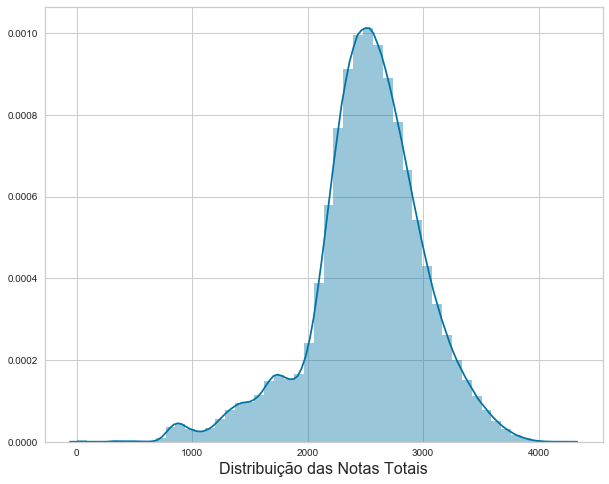

In [33]:
# solução histograma e descrição
print(f'estatística da nota total\n{enem.nota_total.describe()}')

plt.figure(figsize=(10,8))
sns.distplot(enem['nota_total'])
plt.xlabel('Distribuição das Notas Totais', fontsize=16)

## Pergunta: extraia 1% dos dados para explorarmos

- utilize o seed de aleatoriedade 745
- use a função `sample` para extrair 1% dos dados em uma variável chamada `enem_eda`
- plote o histograma de `enem_eda`
- descreva a `nota_total` desse sample de 1%
- a média, mediana e desvio padrão de nosso sample parecem representar o conjunto total?

Enem EDA sampling tem a distribuição
count   47122.000
mean     2518.196
std       487.593
min         0.000
25%      2276.525
50%      2536.000
75%      2816.300
max      4143.500
Name: nota_total, dtype: float64


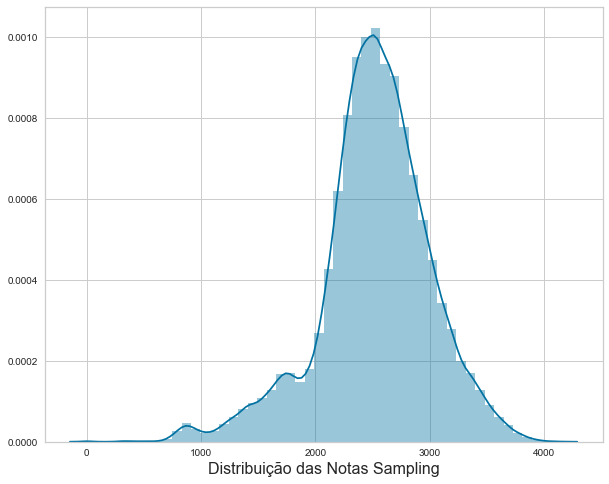

In [34]:
import matplotlib.pyplot as plt
import random
import math
# solução sua função de sampling

def eda_sample(enem):
    # seed
    SEED = 745
    np.random.seed(SEED)
    # 1% de sample em enem_eda
    enem_eda = enem.sample(frac = 0.01)
    print("Enem EDA sampling tem a distribuição")
    # descreva a nota_total
    print(f'{enem_eda.nota_total.describe()}')
    # plote o histograma da nota_total e mostre com plt.show()
    plt.figure(figsize=(10,8))
    sns.distplot(enem_eda['nota_total'])
    plt.xlabel('Distribuição das Notas Sampling', fontsize=16)
    return enem_eda

enem_eda = eda_sample(enem)

A distribuição da nossa amostra parece condizer com a nossa população, em relação a médias e desvio padrão, além do comportamento de normalidade do histograma.

## Pergunta: analise a correlação entre as notas

- inclua a `nota_total` a `todas_as_notas`
- analise a correlação entre as variáveis contidas em todas as notas (uma tabela 10x10)

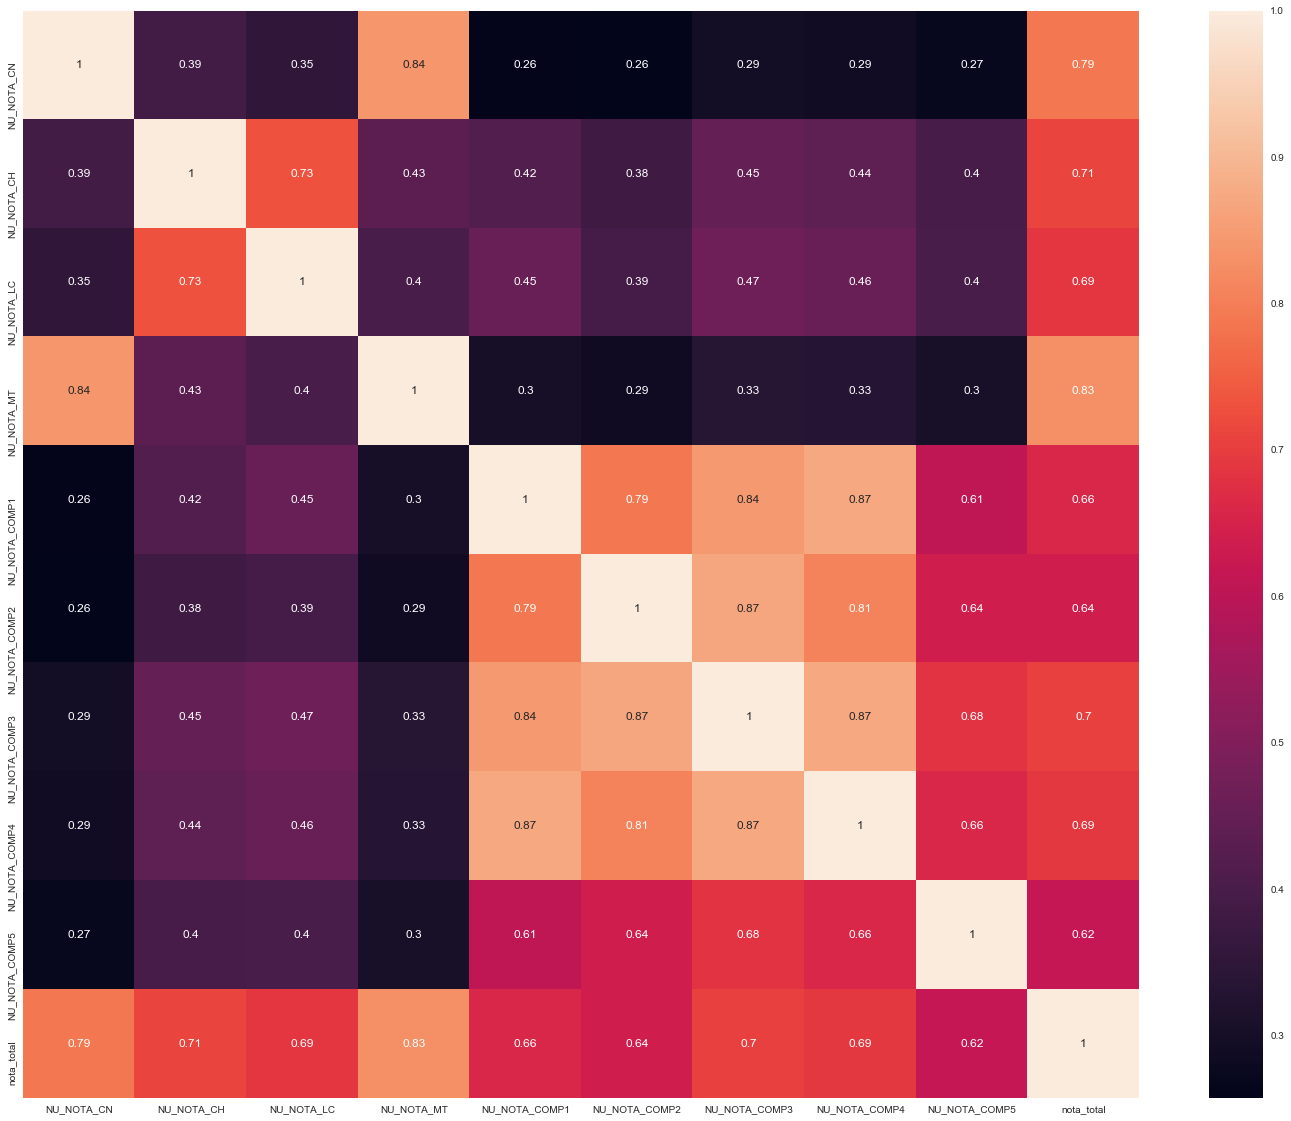

In [35]:
# solução
correlacoes = enem_eda.corr()
plt.figure(figsize=(25,20))
sns.heatmap(correlacoes, annot=True)

In [36]:
if(correlacoes.shape != (10,10)):
    print("A matriz de correlação deveria ser entre 10 notas, totalizando 10 linhas por 10 colunas")


## Pergunta: analise a correlação da nota_total

- extraia somente a linha relativa a `nota_total`
- atribua essa tabela 1x10 a variável `correlacao_com_nota_total`
- plote um gráfico de barras horizontais com o valor da correlação de cada nota com `nota_total`
- o gráfico deve estar ordenado da correlação mais baixa no topo para a correlação mais alta no fim
- use o estilo branco de gráficos do seaborn: `sns.set(style="white")`

In [37]:
# solução: cálculo da tabela de correlação com todas as notas
correlacao_com_nota_total = correlacoes.loc[correlacoes.index == 'nota_total']

In [38]:
print(correlacao_com_nota_total)

            NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_COMP1  \
nota_total       0.791       0.712       0.689       0.829          0.661   

            NU_NOTA_COMP2  NU_NOTA_COMP3  NU_NOTA_COMP4  NU_NOTA_COMP5  \
nota_total          0.640          0.701          0.692          0.616   

            nota_total  
nota_total       1.000  


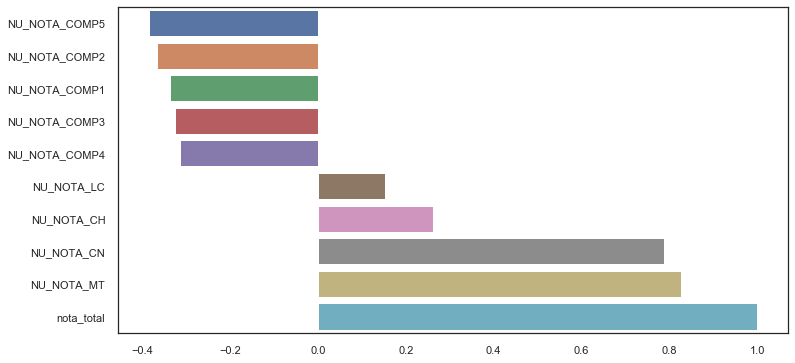

In [39]:
# solução gráfico

def plota_correlacao(dados):
    sns.set(style="white")
    plt.figure(figsize=(12, 6))
    corr = dados.corr()["nota_total"].sort_values()
    sns.barplot(y=corr.index, x=corr.values)
    
plota_correlacao(correlacoes)

## Pergunta: tente um primeiro modelo

- Alguns estudiosos indicam que matemática e línguas formam a base para a educação
- Com base nesse conhecimento prévio, utilize de `enem_eda` as colunas `NU_NOTA_MT` e `NU_NOTA_LC` e `nota_total`
- Crie uma variável chamada `interesse` com esses dados
- Crie uma função chamada `split` que recebe esses dados
    - Ela usa o seed para números aleatórios do numpy 42367
    - Ela faz um `train_test_split` com porcentagem de treino e teste padrão.
    - Ela imprime o tamanho dos conjuntos resultantes de treino e teste
    

In [40]:
# solução: definindo interesse e imprimindo os 5 primeiros elementos
interesse = enem_eda[['NU_NOTA_MT','NU_NOTA_LC','nota_total']].fillna(0)
interesse.head()

,NU_NOTA_MT,NU_NOTA_LC,nota_total
402883,641.800,558.500,3041.200
4926617,410.900,517.000,2445.900
4531480,496.700,350.600,2259.600
4506826,392.600,361.800,2223.100
5987756,494.200,543.800,2727.700


In [41]:
# Solução: a função de split

from sklearn.model_selection import train_test_split

def split(dados):
    # seed
    SEED = 42367
    np.random.seed(SEED)
    # train_test_split
    X = dados.drop(['nota_total'],axis=1)
    y = dados['nota_total']
    train_x, test_x, train_y, test_y = train_test_split(X,y,test_size=0.25)
    print("*" * 80)
    print("Quebrando em treino (x,y) e teste (x,y)", train_x.shape, train_y.shape,test_x.shape, test_y.shape)
    print("Usando colunas %s como X" % str(train_x.columns.values))
    print("Desvio padrão do conjunto de testes", test_y.std())
    return train_x, test_x, train_y, test_y

In [42]:
# Código pronto

train_x, test_x, train_y, test_y = split(interesse)
if(train_x.shape[1]!=2):
    print("*" * 80)
    print("Erro! Você deveria possuir somente duas colunas em X")
    print("*" * 80)

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (35341, 2) (35341,) (11781, 2) (11781,)
Usando colunas ['NU_NOTA_MT' 'NU_NOTA_LC'] como X
Desvio padrão do conjunto de testes 485.9037053503875


In [43]:
train_x.info()#, test_x, train_y, test_y

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35341 entries, 358071 to 5462871
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   NU_NOTA_MT  35341 non-null  float64
 1   NU_NOTA_LC  35341 non-null  float64
dtypes: float64(2)
memory usage: 828.3 KB


## Pergunta: execute uma regressão linear

- defina a função `roda_regressao_linear` que recebe os 4 conjuntos de dados de treino e teste (x e y)
- treine um modelo `LinearRegression` do sklearn 
- calcule o R^2 score no conjunto de teste
- calcule o mean squared error (`mse`) e o mean absolute error (`mae`) do conjunto de teste
- imprima essas 3 métricas

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [45]:
# Solução: função para executar a regressão linear

def roda_regressao_linear(train_x, test_x, train_y, test_y):
    
    # crie o modelo, treine com os dados de treino
    model = LinearRegression()
    model.fit(train_x,train_y)
    # calcule o r2_score com os dados de teste
    
    # calcule a predição e os dois tipos de erros
    
    test_pred = model.predict(test_x)
    r2 = r2_score(test_y,test_pred)
    mse = mean_squared_error(test_y, test_pred, squared=False)
    mae = mean_absolute_error(test_y, test_pred)
    print("*" * 80)
    print("r2 score", r2)
    print("mse", mse)
    print("mae", mae)
    
    return model

In [46]:
# código pronto

roda_regressao_linear(train_x, test_x, train_y, test_y)

********************************************************************************
r2 score 0.8354146943609306
mse 197.11846440682848
mae 147.45045948292218


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Pergunta: analise o erro médio absoluto

- compare o erro médio absoluto com o desvio padrão dos estudantes do conjunto de testes
- o que você achou do erro encontrado com o uso desse modelo linear?

## Solução

<p>O erro absoluto médio está abaixo do desvio padrão do modelo, isso nos da um indício que o modelo tem um acerto razoável. Não está completamente fora dos desvios médios.</p>
O r2 score de 83% é um score satisfatório em uma primeira visão, porém não temos comparação com nenhum outro modelo, ou mesmo um Dummy Value para nos dizer se o modelo é realmente bom ou não. 

## Analisando o erro

Utilizando o módulo `yellowbrick` podemos rapidamente plotar os erros encontrados para cada estudante. No eixo X estará a `nota_total` real, enquanto no eixo Y a `nota_total` prevista pelo modelo. Quanto mais próxima da diagonal de identidade (x=y), mais correta a previsão do modelo.

Quanto menor o mean absolute error menor, mais próximo da diagonal será o modelo linear.

C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\base.py:259: DeprecationWarning: this method is deprecated, please use show() instead
  "this method is deprecated, please use show() instead", DeprecationWarning


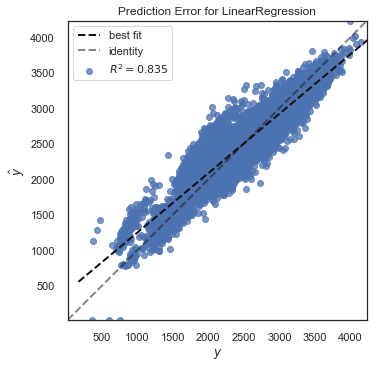

In [47]:
# código pronto

from yellowbrick.regressor import PredictionError

def visualiza_erros(train_x,train_y,test_x,test_y):
    visualizer = PredictionError(LinearRegression())
    visualizer.fit(train_x, train_y)
    visualizer.score(test_x, test_y)
    visualizer.poof()

visualiza_erros(train_x,train_y,test_x,test_y)

## Analisando o erro

Outra maneira importante de analisar o erro é ver a distribuição do resíduo, "o quão errado" nosso modelo está para os diversos valores previstos. No eixo X temos o valor previsto pelo modelo, enquanto no eixo Y o erro dessa previsão (os resíduos).

Um modelo razoável que captura a relação entre as variáveis de X e a variável dependente y comete erros de maneira "normal", isto é, seus resíduos devem seguir uma distribuição normal, mostrando não haver uma tendência para erros maiores ou menores em determinadas situações.

No gráfico a seguir você verá que a distribuição dos resíduos (gráfico da direita) se assemelham ao de uma normal.

C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\base.py:259: DeprecationWarning: this method is deprecated, please use show() instead
  "this method is deprecated, please use show() instead", DeprecationWarning


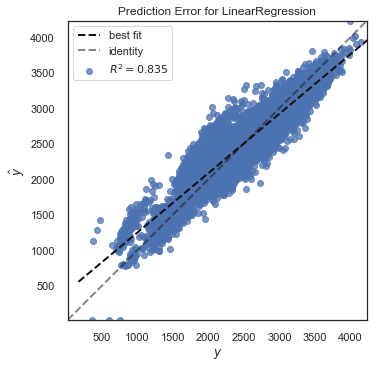

C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\base.py:259: DeprecationWarning: this method is deprecated, please use show() instead
  "this method is deprecated, please use show() instead", DeprecationWarning


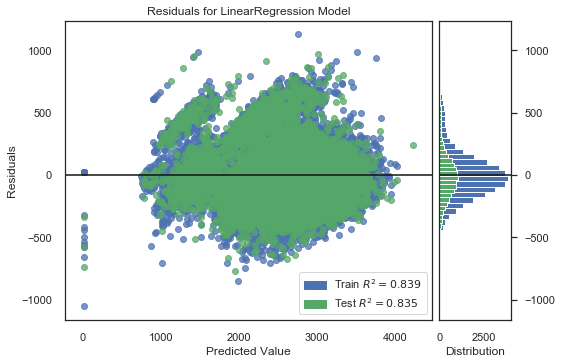

In [48]:
# código pronto

from yellowbrick.regressor import ResidualsPlot

def visualiza_erros(train_x,train_y,test_x,test_y):
    visualizer = PredictionError(LinearRegression())
    visualizer.fit(train_x, train_y)
    visualizer.score(test_x, test_y)
    visualizer.poof()
    
    visualizer = ResidualsPlot(LinearRegression())
    visualizer.fit(train_x, train_y)
    visualizer.score(test_x, test_y)
    visualizer.poof()

visualiza_erros(train_x,train_y,test_x,test_y)

## Explorando combinações de features

Ainda nessa fase de exploração escolhemos um conjunto de features (matemática e línguas) para tentar prever a nota final. Mas sabemos da correlação das variáveis de nota com a nota total que algumas possuem uma correlação maior do que outras.

De maneira análoga ao código anterior execute o modelo linear para diversas combinações de notas que julgar pertinente.

Para cada conjunto de notas que julgar pertinente:
- escolha as colunas e crie a variável `interesse` com elas
- invoque o `split` do `interesse`
- aplique a `run_linear_regression`
- aplique a `visualiza_erros`

Dentre os modelos a testar, verifique alguns importantes:
- com todas as 9 notas, o modelo é capaz de errar pouco? afinal a nota total é uma combinação linear de todas as 9 notas
- com 8 notas, qual o erro mínimo?
- com 1, 2 ou 3 notas que você julgar que faz sentido, quais erros encontra?

In [49]:
# código pronto

def regressao_completa_para(notas):
    interesse = enem_eda[notas]
    train_x, test_x, train_y, test_y = split(interesse)
    model = roda_regressao_linear(train_x, test_x, train_y, test_y)
    visualiza_erros(train_x,train_y,test_x,test_y)

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (35341, 9) (35341,) (11781, 9) (11781,)
Usando colunas ['NU_NOTA_CN' 'NU_NOTA_CH' 'NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP1'
 'NU_NOTA_COMP2' 'NU_NOTA_COMP3' 'NU_NOTA_COMP4' 'NU_NOTA_COMP5'] como X
Desvio padrão do conjunto de testes 485.9037053503875
********************************************************************************
r2 score 1.0
mse 1.6732175156984045e-12
mae 1.1620693938285022e-12


C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\base.py:259: DeprecationWarning: this method is deprecated, please use show() instead
  "this method is deprecated, please use show() instead", DeprecationWarning


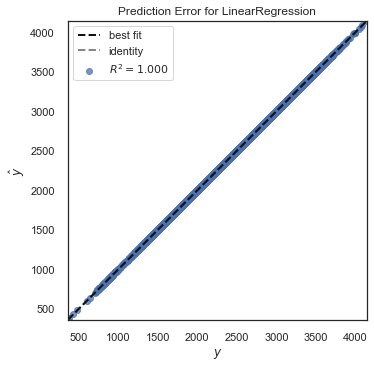

C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\base.py:259: DeprecationWarning: this method is deprecated, please use show() instead
  "this method is deprecated, please use show() instead", DeprecationWarning


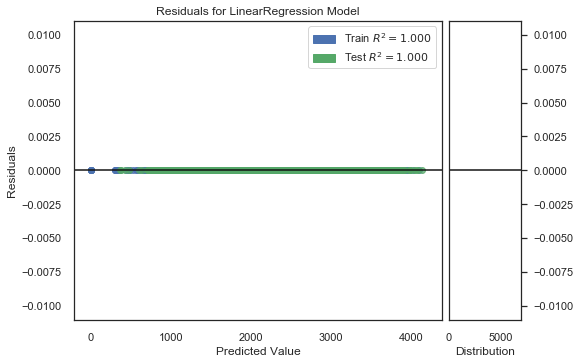

In [50]:
# solução 1: teste com todas as notas
# crie várias células com as combinações que julgar necessárias invocando sempre `regressao_completa_para`
# invoque ela com as notas que deseja analisar *E* a nota_total
regressao_completa_para(enem_eda.columns)



********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (35341, 2) (35341,) (11781, 2) (11781,)
Usando colunas ['NU_NOTA_CH' 'NU_NOTA_COMP3'] como X
Desvio padrão do conjunto de testes 485.9037053503875
********************************************************************************
r2 score 0.6823308328053144
mse 273.85413972301103
mae 173.76784178898694


C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\base.py:259: DeprecationWarning: this method is deprecated, please use show() instead
  "this method is deprecated, please use show() instead", DeprecationWarning


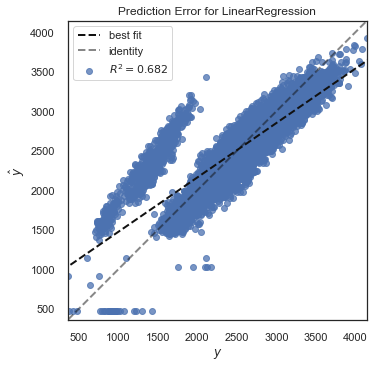

C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\base.py:259: DeprecationWarning: this method is deprecated, please use show() instead
  "this method is deprecated, please use show() instead", DeprecationWarning


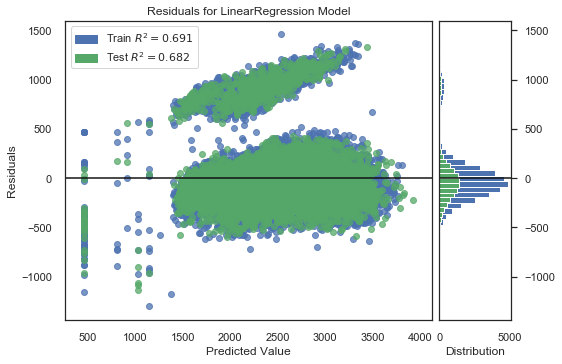

In [51]:
# solução 2: teste outra combinação
regressao_completa_para(['NU_NOTA_CH','NU_NOTA_COMP3','nota_total'])


********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (35341, 1) (35341,) (11781, 1) (11781,)
Usando colunas ['NU_NOTA_CH'] como X
Desvio padrão do conjunto de testes 485.9037053503875
********************************************************************************
r2 score 0.502477077794163
mse 342.71911322010914
mae 236.6397271979594


C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\base.py:259: DeprecationWarning: this method is deprecated, please use show() instead
  "this method is deprecated, please use show() instead", DeprecationWarning


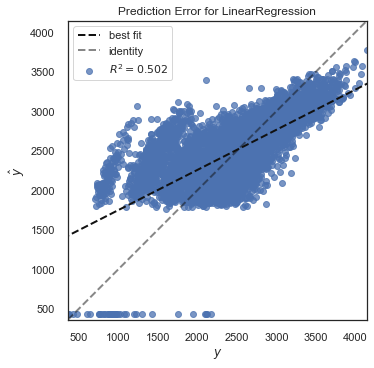

C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\base.py:259: DeprecationWarning: this method is deprecated, please use show() instead
  "this method is deprecated, please use show() instead", DeprecationWarning


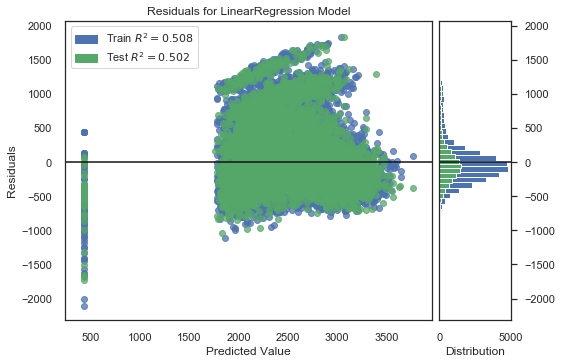

In [52]:
# solução 3: teste outra combinação
regressao_completa_para(['NU_NOTA_CH','nota_total'])


********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (35341, 3) (35341,) (11781, 3) (11781,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Desvio padrão do conjunto de testes 485.9037053503875
********************************************************************************
r2 score 0.9437602601878269
mse 115.22678099654009
mae 91.20294491549383


C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\base.py:259: DeprecationWarning: this method is deprecated, please use show() instead
  "this method is deprecated, please use show() instead", DeprecationWarning


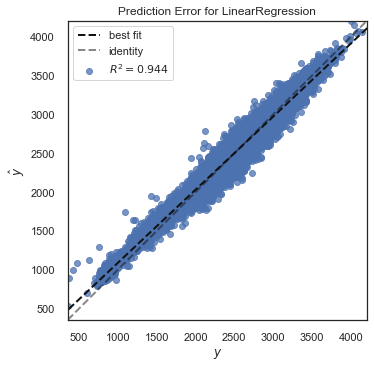

C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\base.py:259: DeprecationWarning: this method is deprecated, please use show() instead
  "this method is deprecated, please use show() instead", DeprecationWarning


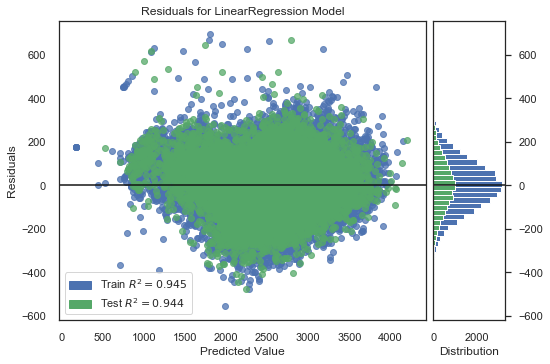

In [53]:
# solução 4: teste outra combinação
regressao_completa_para(['NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_COMP3','nota_total'])


********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (35341, 8) (35341,) (11781, 8) (11781,)
Usando colunas ['NU_NOTA_CN' 'NU_NOTA_CH' 'NU_NOTA_LC' 'NU_NOTA_COMP1' 'NU_NOTA_COMP2'
 'NU_NOTA_COMP3' 'NU_NOTA_COMP4' 'NU_NOTA_COMP5'] como X
Desvio padrão do conjunto de testes 485.9037053503875
********************************************************************************
r2 score 0.9707474939424514
mse 83.10235229108874
mae 66.40186063125523


C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\base.py:259: DeprecationWarning: this method is deprecated, please use show() instead
  "this method is deprecated, please use show() instead", DeprecationWarning


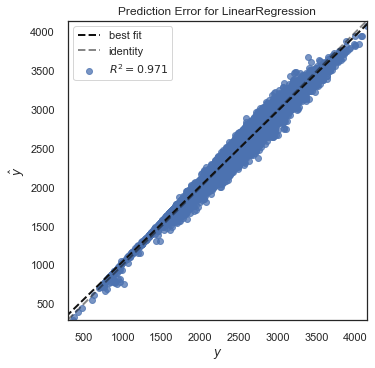

C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\base.py:259: DeprecationWarning: this method is deprecated, please use show() instead
  "this method is deprecated, please use show() instead", DeprecationWarning


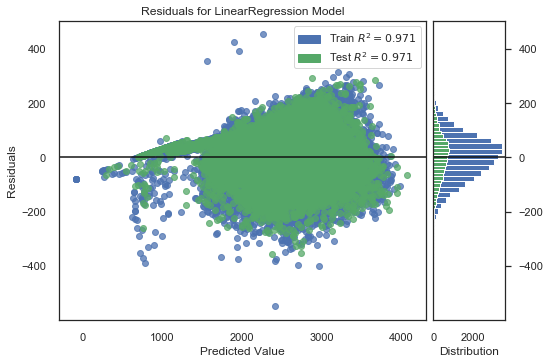

In [54]:
# solução 5: teste outra combinação

regressao_completa_para(enem_eda.drop(['NU_NOTA_MT'],axis=1).columns)

In [55]:
# solução 6: teste outra combinação



In [56]:
# solução 7: teste outra combinação



## Pergunta: tente um modelo específico

- A prova de língua não envolve a criação de textos complexos, mas aborda a língua portuguesa
- A prova de matemática junto coma de língua apresenta um modelo razoável
- A prova de redação apresenta a oportunidade de criar textos complexos

Juntando essas três informações tente o mesmo processo de 4 passos para o modelo linear com `NU_NOTA_LC`, `NU_NOTA_COMP3` e `NU_NOTA_MT`. Analise o erro médio absoluto, o R^2 e a distribuição dos erros comparados aos modelos anteriores.

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (35341, 3) (35341,) (11781, 3) (11781,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Desvio padrão do conjunto de testes 485.9037053503875
********************************************************************************
r2 score 0.9437602601878269
mse 115.22678099654009
mae 91.20294491549383


C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\base.py:259: DeprecationWarning: this method is deprecated, please use show() instead
  "this method is deprecated, please use show() instead", DeprecationWarning


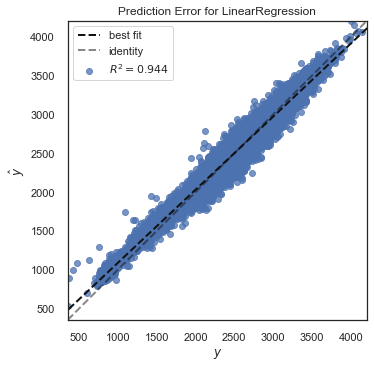

C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\base.py:259: DeprecationWarning: this method is deprecated, please use show() instead
  "this method is deprecated, please use show() instead", DeprecationWarning


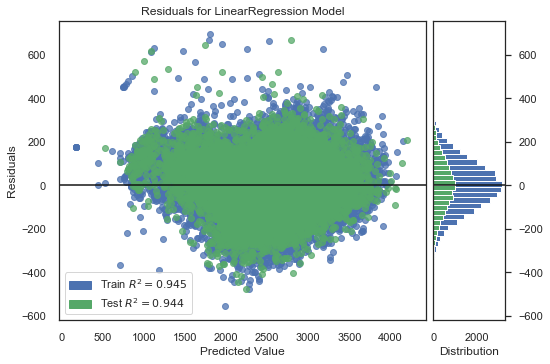

In [57]:
# solução
regressao_completa_para(['NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_COMP3','nota_total'])


## Escolhemos as features, qual o estimador ideal?

Vamos explorar mais ainda nosso conjunto de exploração. Vamos continuar com o conjunto de 3 notas, que seria uma possível conquista: somente com um componente de redação e 2 notas de provas seríamos capazes de prever razoavelmente a avaliação final de um aluno ou aluna.

Apesar dos gráficos anteriores indicarem que o modelo linear tem sido razoável para nossos dados, vamos testar outros estimadores. 

## Pergunta: Prepare diversos estimadores

- Implemente a função `gera_regressores` que retorna uma lista de estimadores
- Do sklearn coloque na lista:
    - `LinearRegression`
    - `Lasso`
    - `Ridge`
    - `DecisionTreeRegressor`
    - `RandomForestRegressor`

In [58]:
# solução

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

def gera_regressores():
    # gere os modelos em uma lista
    ln = LinearRegression()
    ls = Lasso()
    rg = Ridge()
    dtr = DecisionTreeRegressor()
    rf = RandomForestRegressor()
    modelos = {ln,ls,rg,dtr,rf}
    return modelos

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [59]:
# teste

if(len(gera_regressores()) != 5):
    print("Erro!!! São 5 regressores que queremos testar!")

# Pergunta: crie uma função que escolhe parte dos dados

- implemente a função `escolhe_colunas`
- ela recebe o conjunto de dados e as colunas a filtrar
- escolha somente as colunas dos dados
- chame o `split` para esses dados filtrados, separando em treino e teste, x e y
- imprima o histograma de `train_y`
- plote o gráfico com `plt.show()`
- retorne `train_x, test_x, train_y, test_y` nessa ordem

In [60]:
# solução

def escolhe_dados(dados, colunas):
    # extraia as colunas
    interesse = dados[colunas]
    X = dados.drop(['nota_total'], axis=1).fillna(0)
    y = dados['nota_total'].fillna(0)
    # faça o split
    train_x, test_x, train_y, test_y = train_test_split(X,y,test_size=0.25)
    # plote o histograma de train_y
    plt.figure(figsize=(10,8))
    sns.distplot(train_y)
    plt.xlabel('Distribuição das Notas Train', fontsize=16)
    plt.show()
    
    return train_x, test_x, train_y, test_y

## Pergunta: treine e gere as métricas

- crie uma função para treinar e gerar as métricas de uma regressão

In [61]:
# solução:

import time
def treina_e_mede_regressor(modelo, train_x, test_x, train_y, test_y):
    tic = time.time()
    # treine seu modelo
    modelo.fit(train_x,train_y)
    tac = time.time()
    tempo_de_treino = tac - tic

    # calcule a previsão para test_x
    y_pred = modelo.predict(test_x)
    # calcule o mse
    mse = mean_squared_error(test_y, y_pred, squared=False)
    mae = mean_absolute_error(test_y, y_pred)
    # calcule o mae
    print("Resultado", modelo, mse, mae)

    return mse, mae, tempo_de_treino

In [62]:
# código pronto

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

def analisa_regressao(dados):
    train_x, test_x, train_y, test_y = escolhe_dados(dados, ["NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3", "nota_total"])
    
    resultados = []
    for modelo in gera_regressores():
        scaler = StandardScaler()
        # crie um pipeline chamado pipe usando StandardScaler() e o modelo
        
        pipe =  Pipeline([('transformacao', scaler), ('estimador', modelo)])
        
        # use o make_pipeline ou crie um Pipeline
        
        mse, mae, tempo_de_treino = treina_e_mede_regressor(pipe, train_x, test_x, train_y, test_y)
        
        resultados.append([modelo, pipe, tempo_de_treino, mse, mae])
        
    resultados = pd.DataFrame(resultados, columns=["modelo", "pipe", "tempo_de_treino", "mse", "mae"])
    return test_x, test_y, resultados

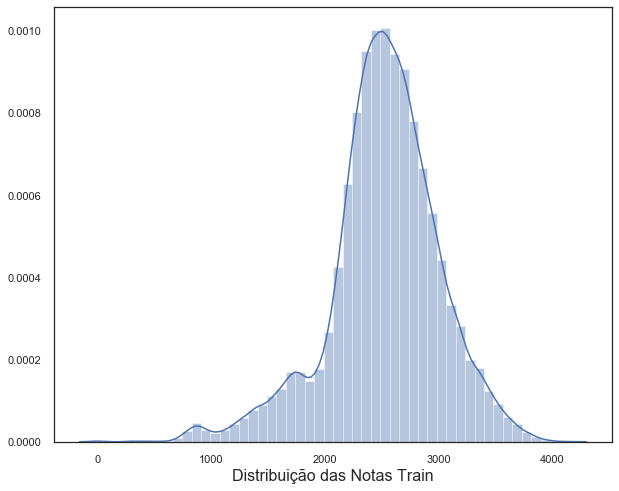

Resultado Pipeline(memory=None,
         steps=[('transformacao',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('estimador',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False) 0.004557994284604079 0.0031283091222638806
Resultado Pipeline(memory=None,
         steps=[('transformacao',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('estimador',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurit

,modelo,mse,mae,tempo_de_treino
0,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",0.005,0.003,0.019
1,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio...",31.421,21.668,12.891
2,"DecisionTreeRegressor(ccp_alpha=0.0, criterion...",64.553,48.696,0.217
3,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.000,0.000,0.010
4,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",1.388,1.058,0.025


In [63]:
test_x, test_y, notas = analisa_regressao(enem_eda)
notas[["modelo", "mse", "mae", "tempo_de_treino"]]

## Resultado parcial

Somente nos nossos dados de exploração fomos capazes de perceber que um modelo de regressão linear parece ser capaz de explicar a variável `nota_total` em função de três variáveis. Por mais que a rede neural possa ter se saído um pouco melhor na métrica de `mean absolute error`, o treino é longo mesmo para 5% dos dados, que ainda estamos explorando.

Como uma regressão linear simples não possui hiper-parâmetros, nosso estudo de regressão vai parar por aqui. Possuímos indícios de que podemos usar um modelo de regressão em cima de 3 notas. Mas e no caso de identificarmos alunos e alunas para bolsa? Nesse caso não precisamos saber a nota final específica, mas sim se ela está no topo das pessoas que fizeram a prova. Isto é, o aluno ou aluna está ou não está no topo X% dos alunos?

Ao invés de usarmos uma regressão, tentaremos usar uma classificação! É comum reduzir um problema de regressão em classificação através do "encaixotamento" (binning) dos valores. Por exemplo, se o topo 25% dos alunos possuem nota maior que 2600, então quem tem menos fica com 0 e quem tem mais fica com 1. Poderíamos fazer também uma classificação entre os menores 25% (0), o bolo do meio (1) e o topo 25% (2). Como nosso cliente deseja entender o topo dos alunos e alunas vamos para a abordagem de 0 e 1.

## Pergunta: As notas de treino

- dado os últimos dados de teste gerados, gere um histograma da variável y (`nota_total` que é o `test_y`)

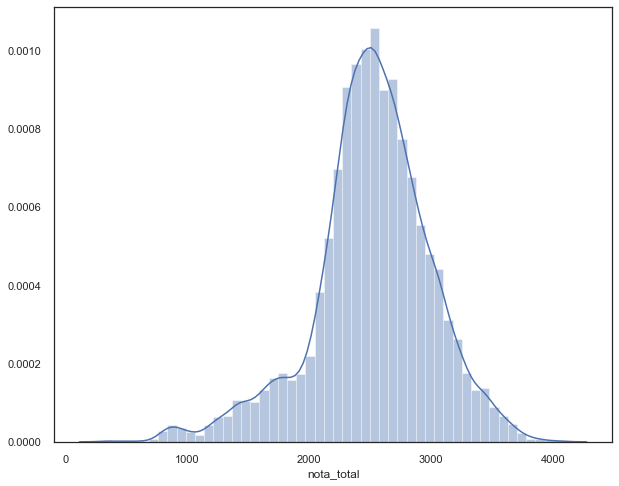

In [64]:
# solução: histograma
plt.figure(figsize=(10,8))
sns.distplot(test_y)


## Pergunta: criando as classes

- Crie uma função chamada `top_p` que recebe uma série de dados e um p que indica o quantil, por padrão 0.75
- A função devolve uma nova série
- O resultado são 0s para  quem está abaixo do quantil, e 1s para quem está acima

In [65]:
# solução

def top_p(serie, p = 0.75):
    # calcule o quantil p
    quant = serie.quantile(q=(p))
    print("quantile encontrado", quant)
    corte = (lambda x : 1 if x > quant else 0) 
    y = serie.apply(corte)
    # defina y como sendo uma serie de 1s e 0s. 1 se o valor da serie for maior que o quantil, 0 se menor
    return y

In [66]:
# teste do top 25%
top_25 = top_p(pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]), p = 0.75).values
if(not np.array_equal(top_25, [0,0,0,0,0,0,0,1,1,1])):
    print("Não retornou o top 25% corretamente, deveria ser ", top_25)

quantile encontrado 7.75


In [67]:
# teste do top 10%

top_10 = top_p(pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]), p = 0.90).values
if(not np.array_equal(top_10, [0,0,0,0,0,0,0,0,0,1])):
    print("Não retornou o top 10% corretamente, deveria ser", top_10)

quantile encontrado 9.1


## Visualizando classes e features

O `yellowbrick` permite visualizar o balanço de suas classes. O código a seguir vai conferir e permitir visualizar que separamos 25% dos alunos e alunas:

In [68]:
# código pronto

y_top25 = top_p(test_y)
y_top25.mean()

quantile encontrado 2812.7


0.2498938969527205

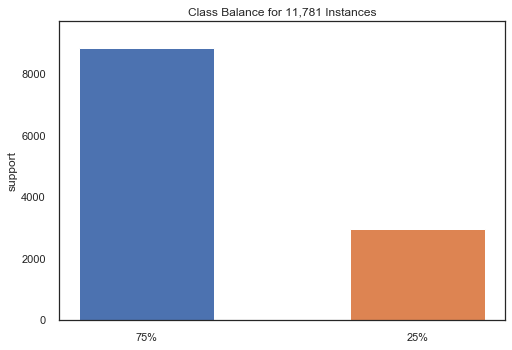

In [69]:
# código pronto

from yellowbrick.target import ClassBalance

visualizer = ClassBalance(labels=["75%", "25%"])
visualizer.fit(y_top25)
visualizer.show()

## Para saber mais: agrupando

O `yellowbrick` possui uma função para visualizar possíveis binnings. O código a seguir mostra 4 sugestões de pontos para agrupamento. Não usaremos a sugestão do yellowbrick pois no nosso caso o cliente já definiu que queria os X% do topo.

C:\ProgramData\Anaconda3\lib\site-packages\yellowbrick\base.py:259: DeprecationWarning: this method is deprecated, please use show() instead
  "this method is deprecated, please use show() instead", DeprecationWarning


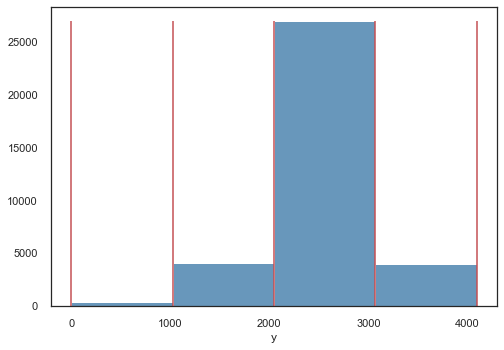

In [70]:
# código pronto

from yellowbrick.target import BalancedBinningReference

visualizer = BalancedBinningReference()
visualizer.fit(train_y)
visualizer.poof()

## O modelo completo para classificação

Vamos passar agora pelo mesmo processo de classificação.

## Pergunta: Prepare diversos estimadores

- Implemente a função `gera_classificadores` que retorna uma lista de estimadores
- Do sklearn coloque na lista:
    - `DummyClassifier` com a estratégia `most_frequent` (mais frequente) que será nosso baseline
    - `LogisticRegression`
    - `RidgeClassifier`
    - `DecisionTreeClassifier`
    - `RandomForestClassifier(n_estimators=10)`
    - `SVC`

In [71]:
# código pronto
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [72]:
# solução

def gera_classificadores():
    # defina seus modelos
    dm = DummyClassifier(strategy='most_frequent')
    lr = LogisticRegression()
    rc = RidgeClassifier()
    dtc = DecisionTreeClassifier()
    rfc = RandomForestClassifier(n_estimators=10)
    svc = SVC()
    modelos = {dm,lr,rc,dtc,rfc,svc}
    return modelos

In [73]:
# código pronto

if(len(gera_classificadores()) != 6):
    print("Erro!!! São 6 classificadores que queremos testar!")

## Pergunta: defina uma nova função de split, agora baseada nas classes

- crie a função `split_classe` que recebe os `dados`
- use `42367` como seed para o `numpy`
- X são todas as colunas exceto a coluna `top_p`
- y é a coluna `top_p`
- chame `train_test_split`
    - stratify é a coluna y
- imprima os tamanhos dos conjuntos
- imprima o número de colunas de X
- imprima a média de test_y
- retorne os conjuntos de treino e teste

In [74]:
def split_classificacao(dados):
    # faça o seed do numpy
    SEED = 42367
    np.random.seed(SEED)
    
    # defina X como todas as colunas de `dados` exceto top_p
    X = dados.drop(['top_p'],axis=1)
    # defina y como somente a coluna top_p
    y = dados.top_p
    # quebre em treino e teste, usando estratificação baseada em y
    train_x, test_x, train_y, test_y = train_test_split(X,y,stratify = y)
    print("*" * 80)
    print("Quebrando em treino (x,y) e teste (x,y)", train_x.shape, train_y.shape,test_x.shape, test_y.shape)
    print("Usando colunas %s como X" % str(train_x.columns.values))
    print("Média do conjunto de testes", test_y.mean())
    return train_x, test_x, train_y, test_y

## Testando sua função de split

In [75]:
# código pronto: teste

interesse = enem_eda[["nota_total", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"]]
interesse['top_p'] = top_p(interesse['nota_total'])
interesse = interesse[["top_p", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"]]

train_x, test_x, train_y, test_y = split_classificacao(interesse)

if(train_x.shape[1] != 3):
    print("*" * 80)
    print("Erro! Você deveria possuir somente três colunas em X")
    print("*" * 80)

if(test_y.mean() <= 0.24 or test_y.mean() >= 0.26):
    print("*" * 80)
    print("Erro! Você deveria capturar somente o top 25% e usar estratificação no split")
    print("*" * 80)
    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


quantile encontrado 2816.3
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (35341, 3) (35341,) (11781, 3) (11781,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.2499787793905441


## Pergunta: implemente o treino e o teste do classificador

In [76]:
from sklearn.metrics import accuracy_score

# solução:

import time
def treina_e_mede_classificador(pipe, nome, train_x, test_x, train_y, test_y):
    tic = time.time()
    # treine o pipeline
    pipe.fit(train_x,train_y)
    tac = time.time()
    tempo_de_treino = tac - tic
    # calcule a accuracy_score
    y_pred = pipe.predict(test_x)
    
    print("Resultado", nome, accuracy_score(test_y,y_pred))

    return accuracy_score(test_y,y_pred), tempo_de_treino

## Pergunta implemente a função de escolha de dados e split para classificação

In [77]:
# solução:

def escolhe_dados_para_classificacao(dados, colunas, p):
    interesse = dados[colunas]
    nota_total = dados.nota_total
    interesse['top_p'] = top_p(nota_total,p)

    colunas.remove("nota_total")
    interesse = interesse[[*colunas, "top_p"]]
    
    train_x, test_x, train_y, test_y = split_classificacao(interesse)
    train_y.hist()
    plt.show()
    return train_x, test_x, train_y, test_y

quantile encontrado 2816.3
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (35341, 3) (35341,) (11781, 3) (11781,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.2499787793905441


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


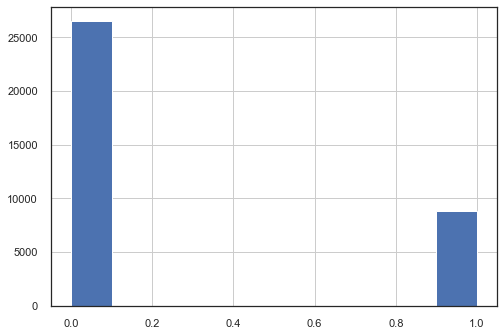

In [78]:
# testando a escolha

train_x, test_x, train_y, test_y = escolhe_dados_para_classificacao(enem_eda, ["nota_total", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"], p=0.75)

if(train_x.shape[1] != 3):
    print("*" * 80)
    print("Erro! Você deveria possuir somente três colunas em X")
    print("*" * 80)

if(test_y.mean() <= 0.24 or test_y.mean() >= 0.26):
    print("*" * 80)
    print("Erro! Você deveria capturar somente o top 25% e usar estratificação no split")
    print("*" * 80)
    

In [79]:
# código pronto

def analisa_classificacao(dados, p = 0.75):
    
    colunas = ["nota_total", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"]
    train_x, test_x, train_y, test_y = escolhe_dados_para_classificacao(dados, colunas, p=p)
    
    resultados = []
    for modelo in gera_classificadores():
        nome = type(modelo).__name__
        pipe = make_pipeline(StandardScaler(), modelo)
        accuracy_score, tempo_de_treino = treina_e_mede_classificador(pipe, nome, train_x, test_x, train_y, test_y)
        resultados.append([nome, modelo, pipe, tempo_de_treino, accuracy_score])
        
    resultados = pd.DataFrame(resultados, columns=["tipo", "modelo", "pipe", "tempo_de_treino", "accuracy_score"])
    return test_x, test_y, resultados.set_index("tipo")


## Pergunta: rode a analisa_classificacao

- rode 6 vezes, cada uma em uma célular diferente, vamos ver o quão bem os modelos tentam prever o top X%
- queremos o top 25% (quantil/p=0.75), top 20%, top 10%, top 5% e top 1%
- queremos também rodar para as últimas 25% pessoas, isto é p=0.25

quantile encontrado 2816.3
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (35341, 3) (35341,) (11781, 3) (11781,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.2499787793905441


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


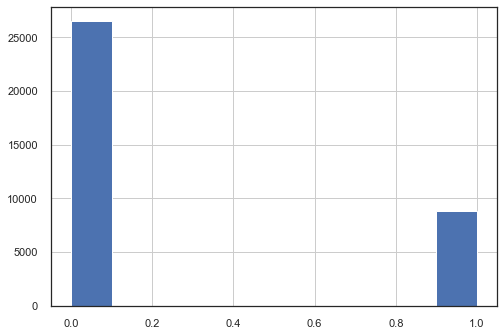

Resultado LogisticRegression 0.9385451150157033
Resultado RandomForestClassifier 0.9277650454121043
Resultado SVC 0.9376114081996435
Resultado RidgeClassifier 0.9228418640183346
Resultado DummyClassifier 0.7500212206094559
Resultado DecisionTreeClassifier 0.9105339105339105


,accuracy_score,tempo_de_treino
tipo,,
LogisticRegression,0.939,0.040
RandomForestClassifier,0.928,0.210
SVC,0.938,3.656
RidgeClassifier,0.923,0.013
DummyClassifier,0.750,0.003
DecisionTreeClassifier,0.911,0.067


In [80]:
# solução top 25%

# rode a analisa_classificacao e armazene test_x, test_y e notas
test_x, test_y, notas = analisa_classificacao(enem_eda, p = 0.75)
notas[["accuracy_score", "tempo_de_treino"]]

quantile encontrado 2891.2
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (35341, 3) (35341,) (11781, 3) (11781,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.19998302351243527


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


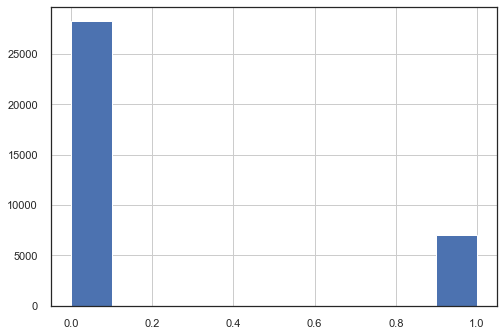

Resultado LogisticRegression 0.9475426534250063
Resultado DecisionTreeClassifier 0.926067396655632
Resultado SVC 0.9472880061115355
Resultado RidgeClassifier 0.9102792632204397
Resultado RandomForestClassifier 0.9403276462099992
Resultado DummyClassifier 0.8000169764875648


,accuracy_score,tempo_de_treino
tipo,,
LogisticRegression,0.948,0.023
DecisionTreeClassifier,0.926,0.064
SVC,0.947,2.911
RidgeClassifier,0.910,0.007
RandomForestClassifier,0.940,0.198
DummyClassifier,0.800,0.002


In [81]:
# solução top 20%
test_x, test_y, notas = analisa_classificacao(enem_eda, p = 0.80)
# rode a analisa_classificacao e armazene test_x, test_y e notas
notas[["accuracy_score", "tempo_de_treino"]]

quantile encontrado 3098.5
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (35341, 3) (35341,) (11781, 3) (11781,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.09999151175621764


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


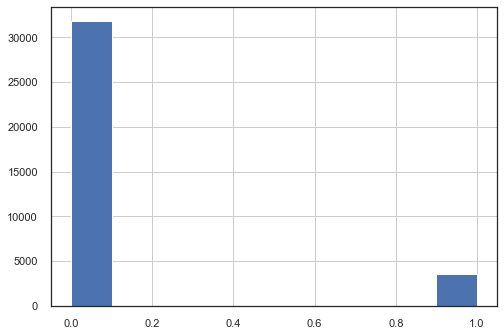

Resultado DummyClassifier 0.9000084882437823
Resultado RidgeClassifier 0.906035141329259
Resultado LogisticRegression 0.9711399711399712
Resultado DecisionTreeClassifier 0.9578134284016637
Resultado RandomForestClassifier 0.9646889058653765
Resultado SVC 0.9716492657669128


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.900,0.003
RidgeClassifier,0.906,0.006
LogisticRegression,0.971,0.028
DecisionTreeClassifier,0.958,0.057
RandomForestClassifier,0.965,0.182
SVC,0.972,1.667


In [82]:
# solução top 10%
test_x, test_y, notas = analisa_classificacao(enem_eda, p = 0.90)
# rode a analisa_classificacao e armazene test_x, test_y e notas
notas[["accuracy_score", "tempo_de_treino"]]

quantile encontrado 3279.595
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (35341, 3) (35341,) (11781, 3) (11781,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.04999575587810882


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


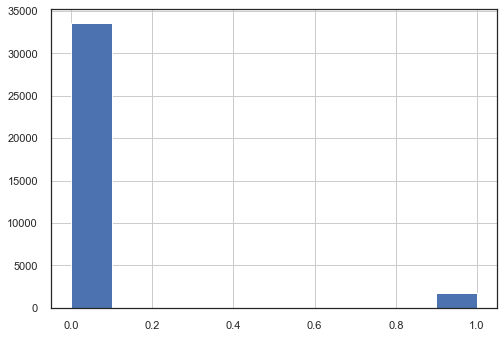

Resultado SVC 0.9830235124352772
Resultado DummyClassifier 0.9500042441218912
Resultado LogisticRegression 0.9831932773109243
Resultado RidgeClassifier 0.9500042441218912
Resultado RandomForestClassifier 0.9820898056192174
Resultado DecisionTreeClassifier 0.9791189202953909


,accuracy_score,tempo_de_treino
tipo,,
SVC,0.983,0.894
DummyClassifier,0.950,0.003
LogisticRegression,0.983,0.032
RidgeClassifier,0.950,0.008
RandomForestClassifier,0.982,0.172
DecisionTreeClassifier,0.979,0.047


In [83]:
# solução top 5%
test_x, test_y, notas = analisa_classificacao(enem_eda, p = 0.95)
# rode a analisa_classificacao e armazene test_x, test_y e notas
notas[["accuracy_score", "tempo_de_treino"]]

quantile encontrado 3587.179
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (35341, 3) (35341,) (11781, 3) (11781,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.010016127663186486


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


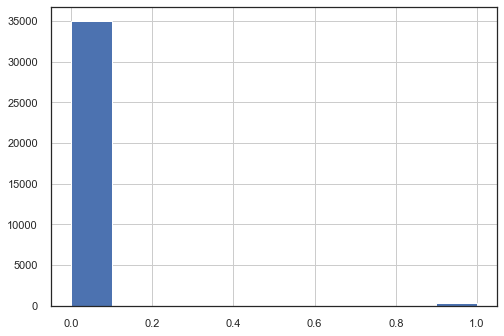

Resultado SVC 0.9952465834818776
Resultado DecisionTreeClassifier 0.9932094049741108
Resultado RidgeClassifier 0.9899838723368135
Resultado RandomForestClassifier 0.9937186996010525
Resultado DummyClassifier 0.9899838723368135
Resultado LogisticRegression 0.9949070537305832


,accuracy_score,tempo_de_treino
tipo,,
SVC,0.995,0.286
DecisionTreeClassifier,0.993,0.033
RidgeClassifier,0.990,0.006
RandomForestClassifier,0.994,0.115
DummyClassifier,0.990,0.002
LogisticRegression,0.995,0.029


In [84]:
# solução top 1%
test_x, test_y, notas = analisa_classificacao(enem_eda, p = 0.99)
# rode a analisa_classificacao e armazene test_x, test_y e notas
notas[["accuracy_score", "tempo_de_treino"]]

quantile encontrado 2276.525
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (35341, 3) (35341,) (11781, 3) (11781,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.7500212206094559


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


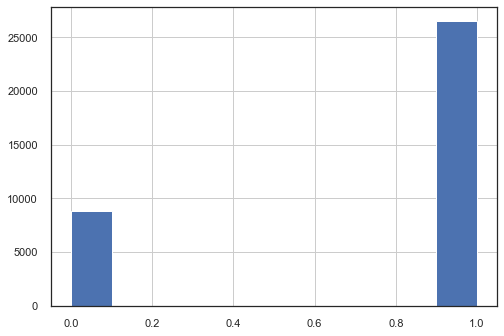

Resultado RidgeClassifier 0.9154570919276802
Resultado RandomForestClassifier 0.9207198030727443
Resultado LogisticRegression 0.9363381716322893
Resultado DecisionTreeClassifier 0.9088362617774383
Resultado SVC 0.9362532891944657
Resultado DummyClassifier 0.7500212206094559


,accuracy_score,tempo_de_treino
tipo,,
RidgeClassifier,0.915,0.008
RandomForestClassifier,0.921,0.222
LogisticRegression,0.936,0.025
DecisionTreeClassifier,0.909,0.064
SVC,0.936,4.118
DummyClassifier,0.750,0.004


In [85]:
# solução bottom 25%
test_x, test_y, notas = analisa_classificacao(enem_eda, p = 0.25)
# rode a analisa_classificacao e armazene test_x, test_y e notas
notas[["accuracy_score", "tempo_de_treino"]]

## Escolhendo o top 25%

Dado o cenário de topo 25%, o DummyClassifier acertou 75% das vezes, errou 25%. O modelo que estamos criando conseguiria atingir no máximo esses 25% a mais de acerto (máximo de 100%). Se conferirmos que o modelo logístico acertou 93.7%, isso significa que 93.7% - 75% = 18.7%. Portanto do ganho máximo de 25% o modelo está acertando 18.7%, um total de 74.8% de ganho do potencial máximo de um modelo.

Por mais que pareça pouco, esses 18.7% representam quase 3/4 de todo o ganho potencial que um modelo pode ter.

Você pode fazer a mesma conta paa os outros ps, lembrando que essa não é uma métrica comum de se analisar. Na prática queremos entender agora como foi que o modelo errou. Ele errou os casos do bottom 75% e do top 25% igualmente? Ou errou mais em um dos dois casos?

quantile encontrado 2816.3
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (35341, 3) (35341,) (11781, 3) (11781,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.2499787793905441


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


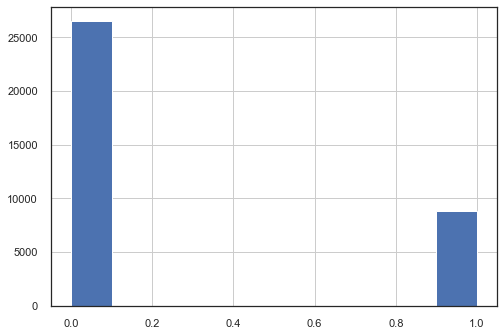

Resultado RidgeClassifier 0.9228418640183346
Resultado SVC 0.9376114081996435
Resultado DecisionTreeClassifier 0.91240132416603
Resultado LogisticRegression 0.9385451150157033
Resultado DummyClassifier 0.7500212206094559
Resultado RandomForestClassifier 0.9281045751633987


,accuracy_score,tempo_de_treino
tipo,,
RidgeClassifier,0.923,0.008
SVC,0.938,3.658
DecisionTreeClassifier,0.912,0.070
LogisticRegression,0.939,0.021
DummyClassifier,0.750,0.002
RandomForestClassifier,0.928,0.208


In [86]:
# código pronto: rodando para top 25%
test_x, test_y, notas = analisa_classificacao(enem_eda, p = 0.75)
# rode a analisa_classificacao e armazene test_x, test_y e notas de 25%
notas[["accuracy_score", "tempo_de_treino"]]

## Plotando a matriz de confusão

Vamos ver quantas vezes os dois principais modelos (Regressão logística e SVC) acertam e erram. Para isso plotaremos a matriz de confusão (código pronto).

In [87]:
# código pronto

import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm):
    
    classes = ['Não topo 25%','Topo 25%']

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Matriz de confusão normalizada')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f') + '%',
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Classe real')
    plt.xlabel('Classe predita')
    plt.tight_layout()
    plt.show()

def print_confusion_for(test_x, test_y, model):
    pred_y = model.predict(test_x)
    print("Acurácia do modelo em teste", model.score(test_x, test_y))
    cnf_matrix = confusion_matrix(test_y, pred_y)

    plot_confusion_matrix(cnf_matrix)


Acurácia do modelo em teste 0.9385451150157033


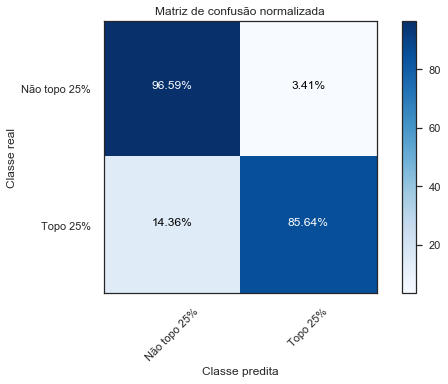

In [88]:
# código pronto

print_confusion_for(test_x, test_y, notas.loc['LogisticRegression']['pipe'])

Acurácia do modelo em teste 0.9376114081996435


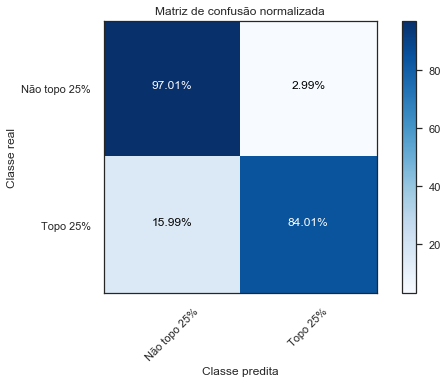

In [89]:
# código pronto

print_confusion_for(test_x, test_y, notas.loc['SVC']['pipe'])

# Vamos validar?

Como o algoritmo de regressão logística simples obteve resultados bons, assim como o de SVC, podemos analisar a matriz de confusão para fazer a escolha. Repare que a regressão logística apresenta maior taxa de acerto no topo 25%, portanto vamos mantê-la.

Como escolhemos uma regressão logística, não possuimos um hiperparâmetro para otimizar, e vamos direto validar o modelo que treinamos. Primeiro separaremos os dados para validação.

In [90]:
# código pronto: separando os dados não usados para treino (que foram os usados em eda)

usados_no_eda = enem_eda.index
a_usar = ~enem.index.isin(usados_no_eda)
enem_validacao = enem[a_usar]
print("Para otimização temos %d elementos" % len(enem_validacao))
del(a_usar)
del(usados_no_eda)

Para otimização temos 4665111 elementos


## Pergunta: separe os dados adequadamente de validação

- implemente a função `separa_dados_de_classificacao_para_validacao`
- X são todas as 3 colunas originais da análise
- Y é o `top_p` indicando se aquele aluno ou aluna está no top 25% baseado em sua `nota_total`
- imprima a média do conjunto Y
- retorne `X, y`

In [91]:
def separa_dados_de_classificacao_para_validacao(dados):
    X = dados[['NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_COMP3']]
    y = top_p(dados.nota_total, p=0.75)# calcule o top 25% como 1 o bottom 75% como 0
    print("Média da validação", y.mean())
    return X, y

## Pergunta: defina uma função de validação cruzada de um modelo de classificação

- implemente a função `treina_e_valida_modelo_de_classificacao` que recebe os dados e o modelo
- separe os dados em X e y usando `separa_dados_de_classificacao_para_validacao`
- rode um cross_val_score com o pipe, 5 folds de validação cruzada estratificada
- imprima a acurácia encontrada na validação cruzada
- faça o treinamento do modelo
- imprima a matriz de confusão do `modelo` para `X` e `y`

Dicas:
- na validação cruzada, utilize o parâmetro `verbose=1` pois o processo pode levar alguns minutos
- na validação cruzada, utilize o parâmetro `n_jobs=-1` para usar todos os processadores possíveis de seu computador

In [95]:
# solução
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

def treina_e_valida_modelo_de_classificacao(dados, modelo):
    # calcule X e y usando a função anterior
    X,y = separa_dados_de_classificacao_para_validacao(dados)
    cv = KFold(n_splits=10, shuffle = True)
    scores = cross_val_score(modelo, X, y, cv=cv, verbose=1, n_jobs=-1)
    mean = scores.mean()
    std = scores.std()
    print("Acurácia entre [%.2f,%.2f]" % (100*mean - 2*std, 100*mean + 2*std))
    
    modelo.fit(X, y)
    print_confusion_for(X, y, modelo)

quantile encontrado 2818.35
Média da validação 0.25000005358929295


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   15.9s finished


Acurácia entre [93.61,93.61]
Acurácia do modelo em teste 0.9360548977291215


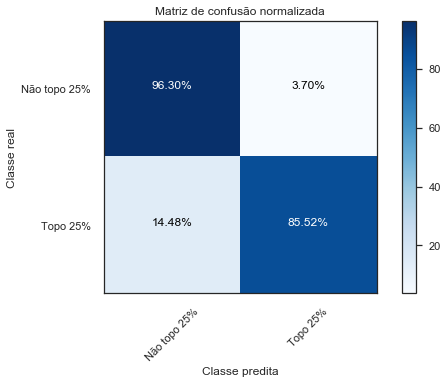

In [96]:
pipeline_logistica = make_pipeline(StandardScaler(), LogisticRegression())
treina_e_valida_modelo_de_classificacao(enem_validacao, pipeline_logistica)

## Cross validation e a matriz de confusão

Os dois resultados vão dar uma ideia do quão bom seu modelo será no mundo real.

## Lembrei de uma coisinha...

É **muito** comum no mundo real chegarmos em um resultado pior que nosso baseline. Nesses dados conseguimos um modelo razoável, mas mesmo assim também é **bem** comum, no final do processo de modelagem, lembrar de um outro tipo de modelo de base que poderíamos usar de comparação. Qual heurística simples poderia nos dizer quem vai estar nos top 25%? Repara que essa pergunta deve ser feita **antes** de se começar o projeto. Mas mesmo assim é muito comum somente próximo ao fim do projeto, agora entendendo melhor nosso conjunto de dados, chegar a ideias de heurísticas simples e poderosas que poderiam ser melhores que um modelo complexo. Infelizmente isso também pode acontecer com uma frequencia razoável. Temos que entender que faz parte: testamos heurísticas antes (como o DummyClassifier) e em qualquer momento que vierem a cabeça.

Vamos então testar uma delas?

Se soment sabemos as 3 notas de um aluno ou aluna, será que quem está no top 25% dessas 3 notas serão as pessoas que estarão no top 25% de todas as notas? Parece ser algo razoável de se imaginar como verdadeiro. Vamos então criar o **nosso estimador**! É normal "suar frio" nesse instante, será que a heurística - que parece fazer sentido - será melhor que o modelo?

## Pergunta: Implementando nosso estimador

Vamos implementar uma classe com diversas funções que todos os estimadores devem possuir. Ao treinar nosso estimador ele olha todos os alunos de treino e calcula a nota que separa o top 25%. Ao validar ele usa essa nota: se o aluno ou aluna tem uma nota maior que a nota de corte, é top 25% (1), caso contrário não é (0).

- Implemente a função `fit`. Ela recebe em X as 3 colunas que desejamos somar e deve calcular qual é o quantil de top 25%
- Implemente a função `predict`. Ela recebe X com as 3 colunas, calcula a soma delas e verifica quem está acima do quantil. Quem está acima é classificada como 1, quem está abaixo como 0
- Implemente a função `score`. Ela calcula a acurácia usando a função `accuracy_score` e as predições que o próprio estimador fez
- A função `get_params` não devolve nada uma vez que nosso estimador não possue paramêtros a serem otimizados

In [97]:
# solução: implemente o código que falta

from sklearn.metrics import accuracy_score

class HeuristicaTop25:
 
    def fit(self, X, y = None):
        if(X.shape[1] != 3):
            print("Erro!!! Estávamos esperando 3 colunas!")
            
        parcial = X.sum(axis = 1)
        self.top_25_quantile = pd.Series(parcial).quantile(0.75)
        print("top 25 quantile é %.2f" % self.top_25_quantile)
        return self

    def predict(self, X, y = None):
        parcial = X.sum(axis = 1)
        
        y_pred_true_false = pd.Series(parcial).quantile(0.75)
        corte = (lambda x : 1 if x > y_pred_true_false else 0) 
        y_pred = parcial.apply(corte)
        return y_pred

    def score(self, X, y = None):
        return accuracy_score(y, self.predict(X, y))

    def get_params(self, deep=True):
        return {}

quantile encontrado 2818.35
Média da validação 0.25000005358929295


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.9s finished


Acurácia entre [91.98,91.99]
top 25 quantile é 1238.10
Acurácia do modelo em teste 0.9198713599740713


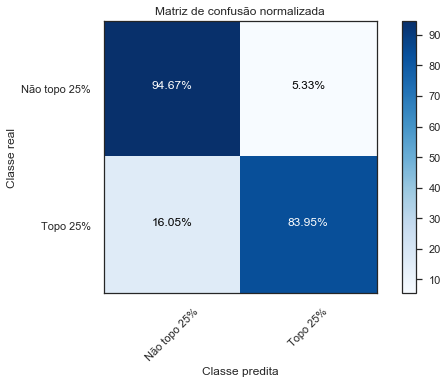

In [98]:

treina_e_valida_modelo_de_classificacao(enem_validacao, HeuristicaTop25())


quantile encontrado 2818.35
Média da validação 0.25000005358929295


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   44.5s finished


Acurácia entre [93.60,93.61]
Acurácia do modelo em teste 0.9360542546576062


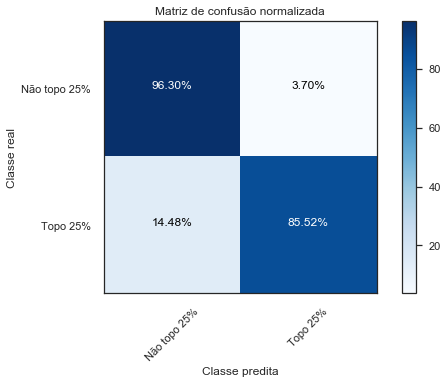

In [99]:
treina_e_valida_modelo_de_classificacao(enem_validacao, LogisticRegression())

quantile encontrado 2818.35
Média da validação 0.25000005358929295


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.1s finished


Acurácia entre [62.51,62.51]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Acurácia do modelo em teste 0.6251401092064047


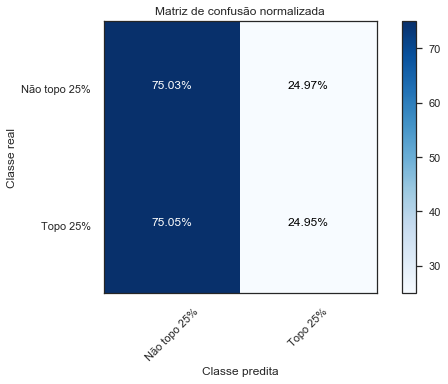

In [100]:
treina_e_valida_modelo_de_classificacao(enem_validacao, DummyClassifier())

## Pergunta: Compare os resultados  da acurácia e da matriz de confusão entre (a) heurística final com (b) o DummyClassifier e (c) a LogisticRegression

### Solução

##### Resultado DummyClassifier 0.62
##### Resultado Heurística 0.92
##### Resultado LogisticRegression 0.94

Podemos perceber que o DummyClassifier tem o pior rendimento dos tres modelos, a diferença entre a Heurística e a Regressão Logistica é pequena, de apenas 2% na classificação. Isso porque identificamos que as 3 notas são suficientes para predizer o resultado final, essa heurística foi muito boa. Considerando os tempos de execução do nosso projeto a regressão logistica teve um resultado melhor e um tempo de razoável de conclusão de ciclo. podemos utiliza-lo para resolver esse problema. 


## Pergunta: Sugira uma outra heurística que poderia ser usada para tentar detectar facilmente o top 25%, sem a necessidade de um modelo complexo

### Solução

Poderiamos somar as notas das 3 principais categorias, ordenar e selecionar o quartil 25%, como já consideramos que as 3 variáveis conseguem simular com uma precisão muito boa a distribuição de notas total. Se fizermos isso com toda a base, teremos um grande volume de dados, mas com apenas 3 variáveis solucionaríamos o problema com uma quantidade boa de dados. 

## Pergunta: Se uma faculdade oferecer bolsa somente para quem o modelo julgar estar no top 25% o que acontece quando ele julga errôneamente que alguém não está no top 25%? E se julgar errôneamente que está no top 25%?

### Solução

Ao julgar erroneamente alguém que não está no top 25% ele estará deixando de fornecer a bolsa para um aluno que mereceria, e ao errar quem está no top 25% ele iria fornecer uma bolsa para um aluno que não teve nota para tal.

## Para saber mais

Essa seção serve para instigar sua curiosidade em possíveis caminhos que queira ler e se aprofundar, todos ligados ao projeto atual. Nenhum deles é obrigatório para o projeto em si.

### TRI 

Na prática a prova do Enem já usa métodos estatísticos para entender as dificuldades de suas questões e balanceá-las de diversas maneiras. A Teoria de Resposta ao Item (IRT em inglês) é uma das abordagens usadas para analisar e adaptar questões e provas. No Brasil diversas empresas e startups usam a tecnologia para entender as dificuldades e facilidades que pessoas possuem, com o objetivo de otimizar o estudo das mesmas.

### E no ano seguinte?

Devido ao TRI podemos esperar uma certa uniformidade entre provas aplicadas em anos diferentes. Mas fica a questão: estamos treinando agora nosso modelo com X% dos alunos que fizeram a prova em um ano X, portanto precisaríamos que X% dos alunos fizessem a prova completa para termos um modelo capaz de julgar somente a partir das provas parciais: não removemos a necessidade de criação da prova. Imaginando que grande parte do custo está na distribuição e correção manual da redação, existe muita margem para otimização.

Uma outra abordagem seria treinar o modelo nos dados de um ano anterior a X e ver se o modelo se comporta bem para todos os anos posteriores. Repare como a definição do processo de separação dos dados de treino (por %? por ano?) e de validação faz muita diferença em entender como podemos usar o modelo no mundo real.

### 25%?

Nossa heurística envolveu usar o top 25%, mas poderíamos testar com os top 30% das notas parciais se seriam os top 25% das notas totais. Estaríamos errando mais para um lado do que para o outro, e isso pode ser aceitável por nosso cliente. Poderíamos continuar com a modelagem, criando um hiper parâmetro em nosso modelo e tentando otimizá-lo, por exemplo, a medida que conversamos com a empresa cliente

### Redes neurais

Neste projeto não usamos redes neurais (TensorFlow, Keras, Pytorch etc) mas é outro tipo de classificador, assim como AdaBoost e outros que poderiam ser utilizados. Como o conjunto de dados é bem grande e o relacionamento entre as notas é linear (sabemos que a nota total é a soma das notas parciais, mas não sabemos a relação entre as notas que não usamos), os modelos mais simples foram capazes de pegar boa parte do padrão encontrando nos resultados finais.


### Classes balanceadas

Se usamos 75% e 25% existe um desbalanceamento das classes e isso bagunça nossas métricas e análises. O mesmo ocorreria com 3 ou mais classes distintas. Existem diversas abordagens para tentar corrigir isso. Uma delas é simplesmente remover parte dos dados da classe que está aparecendo "demais". Isto é, dos 75%, joga uma parte aleatória fora (ou usa outros métodos para criar/remover samples). O código a seguir é um exemplo de como balancear através de jogar fora dados aleatoriamente. Dado os dados já com a coluna `top_p` ele vai balancear para 50% 50% as classes:

```
from imblearn.under_sampling import RandomUnderSampler

def random_under_sampler(dados):
    X = dados.drop('top_p', axis=1)
    y = dados['top_p']
    X_under, y_under = RandomUnderSampler(random_state=0).fit_resample(X, y)
    X_under = pd.DataFrame(X_under, columns=X.columns)
    X_under['top_p'] = y_under
    return X_under
```

Teríamos que levar em consideração que o DummyClassifier passaria a acertar agora somente 50% dos casos, pois as duas classes aparecem proporcionalmente.

# Parabéns, você concluiu o projeto da Alura!